In [1]:
!which python3

/N/project/DL_MRI/Myocarditis-segmentation/vm_sripad/bin/python3


In [2]:
#importing libraries
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
from patch_extractor import PatchExtractor
import skimage.io as io
import tqdm as tqdm
import warnings
warnings.filterwarnings("ignore")


In [3]:
def extract_patches_valid(image_array,mask_array,patch_size=(512,512)):
    images_list = []
    masks_list = []
    for r in range(0,image_array.shape[0],patch_size[0]):
        for c in range(0,image_array.shape[1],patch_size[1]):
            r_patch = image_array[r:r+patch_size[0],c:c+patch_size[1]]
            r_mask = mask_array[r:r+patch_size[0],c:c+patch_size[1]]
            if r_patch.shape[:-1]!=patch_size:
                continue
                
            images_list.append(r_patch)
            masks_list.append(r_mask)
            
            
    return images_list,masks_list
            
            
            
            
            
     
            
        
    

In [4]:
image_path_train = "Roof_Segmentation/AIRS/trainval/train/image/"
mask_path_train = "Roof_Segmentation/AIRS/trainval/train/label/"


image_path_val = "Roof_Segmentation/AIRS/trainval/val/image/"
mask_path_val = "Roof_Segmentation/AIRS/trainval/val/label/"

Train image

In [4]:
image_file_names = os.listdir(image_path_train)


In [84]:
len(image_file_names)

857

Generating patches for the whole dataset

In [15]:
np.random.seed(42)
random.seed(42)
sampled_images_training = random.sample(image_file_names,40)

In [18]:

patch_list = []
save_path = "Roof_segmentation_processed/Train_patches/"
for f in tqdm.tqdm(sampled_images_training):
    file_name = f.split("/")[-1].replace(".tif","")
    mask_path = mask_path_train+"/"+f.split("/")[-1]
    image_read = tifffile.imread(image_path_train+f)
    mask_read = tifffile.imread(mask_path)
    
    images_l,masks_l = extract_patches_valid(image_read,mask_read)
    for im_c in range(0,len(images_l)):
        im_patch_save_path = f"{save_path}/images/{file_name}_{im_c}_.tif"
        im_mask_save_path = f"{save_path}/masks/{file_name}_{im_c}_.tif"
        tifffile.imwrite(im_patch_save_path,images_l[im_c])
        mask_ = masks_l[im_c]
        contours, hierarchy = cv2.findContours(image=mask_, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)


        tifffile.imwrite(im_mask_save_path,mask_)
        patch_list.append([file_name,im_patch_save_path,im_mask_save_path,len(contours)])
    
    

100%|███████████████████████████████████████████| 40/40 [05:10<00:00,  7.75s/it]


In [19]:
data_df = pd.DataFrame(patch_list,columns=['filename','patch_path','mask_path','n_contours'])

In [20]:
data_df

,filename,patch_path,mask_path,n_contours
0,christchurch_794,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,7
1,christchurch_794,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,7
2,christchurch_794,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,8
3,christchurch_794,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,7
4,christchurch_794,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,3
...,...,...,...,...
14188,christchurch_458,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,10
14189,christchurch_458,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,8
14190,christchurch_458,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,13
14191,christchurch_458,Roof_segmentation_processed/Train_patches//ima...,Roof_segmentation_processed/Train_patches//mas...,7


In [69]:
data_df.values

array([['christchurch_794',
        'Roof_segmentation_processed/Train_patches//images/christchurch_794_0_.tif',
        'Roof_segmentation_processed/Train_patches//masks/christchurch_794_0_.tif',
        7],
       ['christchurch_794',
        'Roof_segmentation_processed/Train_patches//images/christchurch_794_1_.tif',
        'Roof_segmentation_processed/Train_patches//masks/christchurch_794_1_.tif',
        7],
       ['christchurch_794',
        'Roof_segmentation_processed/Train_patches//images/christchurch_794_2_.tif',
        'Roof_segmentation_processed/Train_patches//masks/christchurch_794_2_.tif',
        8],
       ...,
       ['christchurch_458',
        'Roof_segmentation_processed/Train_patches//images/christchurch_458_358_.tif',
        'Roof_segmentation_processed/Train_patches//masks/christchurch_458_358_.tif',
        13],
       ['christchurch_458',
        'Roof_segmentation_processed/Train_patches//images/christchurch_458_359_.tif',
        'Roof_segmentation_proce

In [58]:
data_df.to_csv("random_40_sampled_data.csv",index=None)

In [42]:
np.unique(data_df[data_df['n_contours'] == 0]['filename'],return_counts=True)

(array(['christchurch_1005', 'christchurch_1056', 'christchurch_13',
        'christchurch_136', 'christchurch_147', 'christchurch_180',
        'christchurch_189', 'christchurch_195', 'christchurch_200',
        'christchurch_232', 'christchurch_272', 'christchurch_348',
        'christchurch_393', 'christchurch_415', 'christchurch_458',
        'christchurch_471', 'christchurch_472', 'christchurch_474',
        'christchurch_486', 'christchurch_522', 'christchurch_595',
        'christchurch_607', 'christchurch_610', 'christchurch_616',
        'christchurch_650', 'christchurch_685', 'christchurch_697',
        'christchurch_72', 'christchurch_725', 'christchurch_728',
        'christchurch_746', 'christchurch_757', 'christchurch_763',
        'christchurch_794', 'christchurch_798', 'christchurch_805',
        'christchurch_922', 'christchurch_943', 'christchurch_973'],
       dtype=object),
 array([195, 361, 361, 293, 276, 349, 298, 209, 361, 306, 345, 358,  55,
         43,  74, 31

In [44]:
np.unique(data_df[data_df['n_contours'] > 0  ]['filename'],return_counts=True)

(array(['christchurch_1005', 'christchurch_136', 'christchurch_147',
        'christchurch_180', 'christchurch_189', 'christchurch_195',
        'christchurch_232', 'christchurch_272', 'christchurch_348',
        'christchurch_393', 'christchurch_415', 'christchurch_458',
        'christchurch_471', 'christchurch_472', 'christchurch_474',
        'christchurch_486', 'christchurch_520', 'christchurch_522',
        'christchurch_595', 'christchurch_607', 'christchurch_610',
        'christchurch_616', 'christchurch_650', 'christchurch_685',
        'christchurch_697', 'christchurch_72', 'christchurch_725',
        'christchurch_746', 'christchurch_757', 'christchurch_794',
        'christchurch_798', 'christchurch_805', 'christchurch_973'],
       dtype=object),
 array([166,  68,  85,  12,  63, 152,  55,  16,   3, 306, 318, 287,  49,
        179, 134, 268, 361, 301,   7,  31, 353, 322, 304, 326,  81,  31,
          4,  15, 329, 336, 131,  31, 313]))

In [46]:
#zero 
len(data_df[data_df['n_contours'] == 0])

8756

In [47]:
#greater than zero
len(data_df[data_df['n_contours'] > 0])

5437

Split into train valid and test

35  train(5 valid, 5 test

In [88]:
train_imgs = np.unique(data_df['filename'])[0:30]
valid_imgs = np.unique(data_df['filename'])[30:35]
test_imgs = np.unique(data_df['filename'])[35:40]

In [96]:
train_csv = data_df[data_df['filename'].isin(train_imgs)]
valid_csv = data_df[data_df['filename'].isin(valid_imgs)]
test_csv = data_df[data_df['filename'].isin(test_imgs)]

In [97]:
zero_n_contours_training_datapoints = train_csv.drop(train_csv[train_csv['n_contours']==0].index).reset_index(drop=True).iloc[0:50,:]
train_csv.drop(train_csv[train_csv['n_contours']==0].index,inplace=True)
train_csv = pd.concat([train_csv,zero_n_contours_training_datapoints])


In [83]:
train_csv.to_csv("train_patches_from_40_random_sample.csv",index = None)
valid_csv.to_csv("valid_patches_from_40_random_sample.csv",index = None)
test_csv.to_csv("test_patches_from_40_random_sample.csv",index = None)

In [98]:
len(valid_csv)

1805

In [99]:
len(test_csv)

1805

In [94]:
test_imgs

array(['christchurch_798', 'christchurch_805', 'christchurch_922',
       'christchurch_943', 'christchurch_973'], dtype=object)

In [95]:
valid_imgs

array(['christchurch_728', 'christchurch_746', 'christchurch_757',
       'christchurch_763', 'christchurch_794'], dtype=object)

In [100]:
361*5

1805

In [111]:
plt.rcParams["figure.figsize"] = [20,20]


Text(0.5, 1.0, 'Corresponding mask')

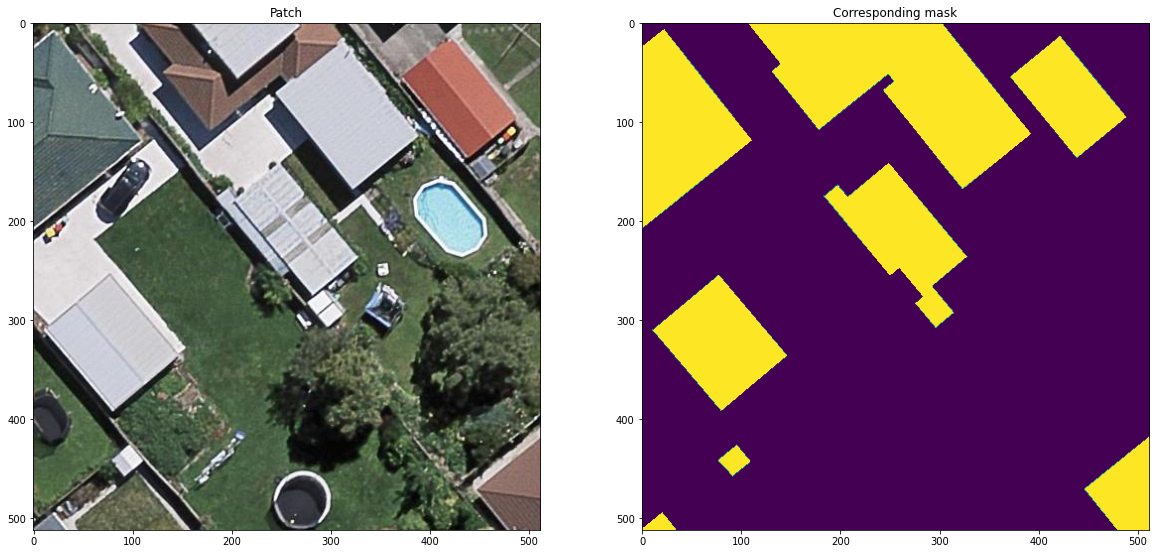

In [118]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(images_l[-80])
ax[1].imshow(masks_l[-80])
ax[0].set_title("Patch")
ax[1].set_title("Corresponding mask")
